In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
print(titanic.head())
print(type(titanic)) #<class pandas...> 이런 식으로 도출
print(titanic.dtypes) #각 컬럼별 데이터타입
print(titanic.describe()) # 평균, 표편 등
print(titanic.dtypes['age']) #특정 컬럼의 데이터타입 출력
print(titanic.columns) #컬럼 이름 출력
print(titanic['age'].sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked     

In [ ]:
#Factor 데이터 변환

gender =[]
for i in range(9):
  gender.append('male')


df = pd.DataFrame(gender, columns=['Gender']) #gender 리스트를 df로 변환, 컬럼 이름은 Gender
print(df)
print(df.dtypes)
df["Gender"] = df["Gender"].astype('category') #범주화된 컬럼으로 데이터 변환
print(df[df["Gender"]=="male"].count()) #gender가 male인 개수 출력

  Gender
0   male
1   male
2   male
3   male
4   male
5   male
6   male
7   male
8   male
Gender    object
dtype: object
Gender    9
dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/제주특별자치도 제주시_환경오염물질배출시설자율점검업소현황_20240719.csv",index_col=0)

print(df.head())
print(df.info()) #데이터 속성 정보 확인
print(df.shape)

            사업장명칭                         소재지         지정분야     데이터기준일자
해당연도                                                                  
2024        (주)광동  제주특별자치도 제주시 일주서로 7832 (연동)        수질분야5  2024-07-19
2024        (주)대동   제주특별자치도 제주시 구좌읍 행원로13길 39  대기분야4+수질분야4  2024-07-19
2024    (주)무수천주유소    제주특별자치도 제주시 노형로 45 (해안동)        수질분야5  2024-07-19
2024    (주)무지개렌트카  제주특별자치도 제주시 제성1길 30 (도두이동)        수질분야5  2024-07-19
2024  (주)제성자동차공업사   제주특별자치도 제주시 선반로 92 (화북일동)   대기분야4+기타분야  2024-07-19
<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2024 to 2024
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사업장명칭    58 non-null     object
 1   소재지      58 non-null     object
 2   지정분야     58 non-null     object
 3   데이터기준일자  58 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB
None
(58, 4)


In [ ]:
#데이터 탐색 함수 : info, head, tail, shape, len, columns, type
print(df.info())
print(df.shape)
print(len(df))
print(df.columns)
print(df.index[2])

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2024 to 2024
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   사업장명칭    58 non-null     object
 1   소재지      58 non-null     object
 2   지정분야     58 non-null     object
 3   데이터기준일자  58 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB
None
(58, 4)
58
Index(['사업장명칭', '소재지', '지정분야', '데이터기준일자'], dtype='object')
2024


In [ ]:
#데이터 분할
gender_male = titanic[titanic['sex'] == "male"]
print(gender_male)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
0           0       3  male  22.0      1      0   7.2500        S   Third   
4           0       3  male  35.0      0      0   8.0500        S   Third   
5           0       3  male   NaN      0      0   8.4583        Q   Third   
6           0       1  male  54.0      0      0  51.8625        S   First   
7           0       3  male   2.0      3      1  21.0750        S   Third   
..        ...     ...   ...   ...    ...    ...      ...      ...     ...   
883         0       2  male  28.0      0      0  10.5000        S  Second   
884         0       3  male  25.0      0      0   7.0500        S   Third   
886         0       2  male  27.0      0      0  13.0000        S  Second   
889         1       1  male  26.0      0      0  30.0000        C   First   
890         0       3  male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        T

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, f1_score, accuracy_score, recall_score
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y = iris.target
dfx = pd.DataFrame(x, columns = iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfx, dfy], axis=1)
df = df[['sepal length (cm)', 'species']]
df = df[df.species.isin([0,1])] #이진분류
df = df.rename(columns={'sepal length (cm)' : 'sepal_length'})

display(df.head())

,sepal_length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0


In [ ]:
import statsmodels.api as sm
model = sm.Logit.from_formula('species ~ sepal_length', data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Nov 2024   Pseudo R-squ.:                  0.5368
Time:                        11:10:38   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [ ]:
print(result.predict(df.sepal_length)[:10])
ypred = result.predict(df.sepal_length) >= 0.5 #0.5이상이면 1, 0.5미만이면 0
print(ypred[:10])

0    0.165794
1    0.066372
2    0.024798
3    0.014981
4    0.106237
5    0.481599
6    0.014981
7    0.106237
8    0.005411
9    0.066372
dtype: float64
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


In [ ]:
conf = confusion_matrix(df.species, ypred)
print(conf)
print(classification_report(df.species, ypred)) #혼동행렬 요약 정리
print(f1_score(df.species, ypred))
print(accuracy_score(df.species, ypred))
print(recall_score(df.species, ypred))

[[45  5]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

0.8888888888888888
0.89
0.88


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data
y = iris.target
dfx = pd.DataFrame(x, columns = iris.feature_names)
dfy = pd.DataFrame(y, columns=['species'])
df = pd.concat([dfx, dfy], axis=1)

#종속변수, 독립변수 모두 넘파이 배열로 변환
df_input = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
df_output = df['species'].to_numpy()
trainx, testx, trainy, testy = train_test_split(df_input, df_output, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scaled = scaler.transform(trainx)
testx_scaled = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scaled, trainy)
print(model.score(trainx_scaled, trainy)*100) #훈련집합에 대한 분류 성능
print(model.score(testx_scaled, testy)*100) #검증집합에 대한 분류 성능

98.21428571428571
94.73684210526315


# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import trian_test_split
from sklearn.tree import plot_tree

#학습 : 0.7, 검증 : 0.3으로 만들기
trainx, testx, trainy, testy = train_test_split(input, output, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)

# 유형별 단원종합 문제 제1유형

mtcars dataset 활용

In [15]:
#1.연비가 높은 순서대로 데이터 정렬, 연비가 높은 상위 10개 차량에 대한 데이터를 이용한다.
# carb 수가 2개인 경우 마력의 평균값과 carb 수가 1개인 경우 마력의 평균값의 차이를 출력하시오.

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/work/mtcars.csv", encoding='euc-kr')
display(df.head())

df = df.sort_values('mpg', ascending=False) #연비 상위 10개 차량
dfnew = df.iloc[0:10]
display(dfnew) #이 데이터를 이용해보자

df_2 = dfnew.loc[dfnew.carb == 2]
df_1 = dfnew.loc[dfnew.carb == 1]
print(df_2['hp'].mean())
print(df_1['hp'].mean())
print(df_2['hp'].mean() - df_1['hp'].mean())

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


82.6
77.4
5.199999999999989


In [27]:
# 2. 자동차 변속기사 수동(am=1)인 차량들 중에서 4기통(cyl=4)인 데이터들의 연비(mpg)의 평균값과 마력(hp)의 표준편차의 합계를 출력

df = pd.read_csv("/content/drive/MyDrive/work/mtcars.csv", encoding='euc-kr')

df = df.loc[df.am == 1]
display(df.head())

df_m = df.loc[df.cyl == 4]
a = float(df_m['mpg'].mean())
b= float(df_m['hp'].std())

print(a,b)

print(a+b)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


28.075 22.65541562503008
50.730415625030076


In [36]:
#am=0에 대한 연비의 이상값을 나타내는 차량의 수와 이상값의 평균을 출력하시오
# 단, 연비의 이상값은 (연비의 평균+IQR) 이상이거나 (연비의 평균-IQR) 이하인 값이다.
# 여기서 IQR은 3분위 - 1분위이다.

df = pd.read_csv("/content/drive/MyDrive/work/mtcars.csv", encoding='euc-kr')
display(df.head())

dfm = df.loc[df.am == 0]
display(dfm.head())

dfm.describe()

iqr = dfm['mpg'].quantile(0.75) - dfm['mpg'].quantile(0.25)
print(iqr)
mean = float(dfm['mpg'].mean())

dfm_i = dfm.loc[(dfm.mpg >= mean+iqr) | (dfm.mpg <= mean-iqr)]
display(dfm_i)
#차량 수 : 6개

print(round(dfm_i['mpg'].mean(), 3))
#이상값의 평균 : 18.483

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


4.25


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


18.483


In [85]:
#petal.length의 평균+표편과 petal.width의 평균+표편을 출력하시오.
#품종이 setosa인 붓꽃의 petal.length 값에 대하여 min-max scale 변환 후 평균값과 z-score변환((x-평균)/표편) 후 평균값을 각각 출력하시오

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris=load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
display(df.head())

mean = df['petal length (cm)'].mean()
std = df['petal length (cm)'].std()

print("a = ",df['petal length (cm)'].mean()+df['petal length (cm)'].std())

print("b = ",df['petal width (cm)'].mean()+df['petal width (cm)'].std())

dfp = df.loc[df.target == 0]

from sklearn.preprocessing import MinMaxScaler

dfp = dfp[['petal length (cm)','target']]

scaler = MinMaxScaler()
df_m = scaler.fit_transform(dfp)
print("c = ",df_m[:,0].mean())

x=dfp['petal length (cm)'] #z-score에서 x는 해당 컬럼임!

z = (x-mean)/std
print(z.mean())

from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler()
dfz = zscaler.fit_transform(dfp)
print(round(dfz.mean(), 20))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


a =  5.523298233259467
b =  1.96157100229368
c =  0.5133333333333333
-1.3006300899993766
-5.8453e-16


In [92]:
#품종이 1,2인 100개 컬럼 이용하자. 품종이 1인 붓꽃에 대해 sepal.length의 값이 중앙값 이상인 붓꽃의 비율을 구하고, 품종이 2인 것에 대해서는
#petal.length의 값이 중앙값 이상인 붓꽃의 비율을 구한다.
#2 중 petal.length의 값이 중앙값 이상인 붓꽆의 비율 -1 중 sepal.length의 값이 중앙값 이상인 붓꽃의 비율의 값을 출력하시오

from sklearn.datasets import load_iris

df = df.loc[(df.target == 1) | (df.target == 2)]
display(df.head())

df1 = df.loc[df.target == 1]
df2 = df.loc[df.target == 2]

median = df1['sepal length (cm)'].median()
length = len(df1.loc[df1['sepal length (cm)'] >= median])
print(length / 100) # 26%

median_2 = df2['petal length (cm)'].median()
length2 = len(df2.loc[df2['petal length (cm)'] >= median_2])
print(length2 / 100) # 26%


##### 317쪽부터 하면 됨

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0
99,5.7,2.8,4.1,1.3,1.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0


0.26
0.0


# 단원종합문제 제 2유형

In [100]:
#로지스틱 회귀분석, SVM, 앙상블 분석

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


0.935361216730038
0.7954545454545454
[0 1]
[[ 0.78943287  1.13666952  0.37598415  1.77477779  0.75891178  0.85747471
   2.41546706  3.00392653 -0.78426961 -1.60639953 -0.06416403 -1.90456039
   1.17222541  0.82277936 -0.92814952  1.009544    0.69055272 -2.28371876
   0.31420799  0.72010064 -2.17205852  2.08938334  1.09231964  0.16343318
   2.10596285 -2.09878728 -0.41252215  0.78304721  0.00760819  1.20328407
  -0.22796511 -1.11654946 -1.21246303]]
[1.15487295]
[[21 13]
 [ 5 49]]
0.7954545454545454


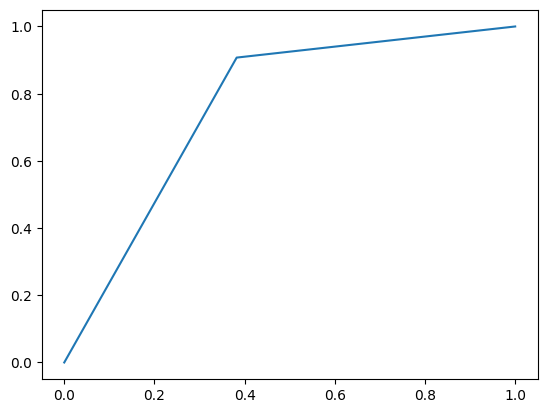

In [121]:
# 로지스틱 회귀분석 : 이온층의 상태(class)를 분류하기 위하여 데이터세트를 훈련용과 테스트용(검증용)으로 구분하고,
# sklearn.linear_model 라이브러리의 LogisticRegression() 함수를 이용하여 로지스틱 회귀분석을 수행하시오.
# 그리고 테스트용 데이터에 대한 성능분석 결과(혼동행렬, 정확도, ROC, AUC)를 출력하시오.

#로지스틱 회귀분석 : 넘파이 변환 -> 스플릿 -> 정규화 -> 회귀분석

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/work/Ionosphere.csv", encoding='euc-kr')
display(df.head())

x = (df.loc[:, ((df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class'))]).to_numpy()

df['Class'] = df['Class'].map({'bad':0, 'good':1})

y = df['Class']

trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)

scaler = StandardScaler()

trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)

model = LogisticRegression(C=20, max_iter=1000)

results = model.fit(trainx_scale, trainy)
ypred = results.predict(testx_scale)

print(model.score(trainx_scale, trainy))
print(model.score(testx_scale, testy))

print(model.classes_)
print(model.coef_)
print(model.intercept_)

print(confusion_matrix(testy, ypred))
print(accuracy_score(testy, ypred))

fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr)
plt.show()

In [5]:
#서포트벡터머신 : sklearn.svm 라이브러리의 SVC 함수를 이용하여 SVM 모형을 구축하시오. (C(cost, gamma)=(10,0.1))을 이용하고
# GridSearchCV 함수를 이용하여 최적의 파라미터를 구한 후, 기존 모형과의 성능을 비교하시오. 개선된 모형의 성능분석 결과(..)를 출력하시오

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#넘파이 변환 -> 스플릿 -> 정규화 -> SVC

df = pd.read_csv("/content/drive/MyDrive/work/Ionosphere.csv", encoding='euc-kr')
display(df.head())

x = (df.loc[:, ((df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class'))]).to_numpy()

y = df['Class'].to_numpy()

trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)

scaler = StandardScaler()

trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)

model = SVC(kernel='rbf',C=10, gamma=0.1, random_state=42)

result = model.fit(trainx_scale, trainy)
ypred = result.predict(testx_scale)

print(model.score(trainx_scale, trainy))
print(model.score(testx_scale, testy))

print(accuracy_score(testy, ypred))

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


1.0
0.9318181818181818
0.9318181818181818


In [9]:
#GridSearchCV 로 최적의 파라미터 찾기

from sklearn.model_selection import GridSearchCV

model = SVC()

param_grid = {
    'kernel' : ['linear', 'poly','sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [0.01, 0.1, 0.001]
}

print(dir(SVC))

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(trainx_scale, trainy)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(testx_scale, testy)
print(accuracy)

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_check_proba', '_compute_kernel', '_decision_function', '_dense_decision_function', '_dense_fit', '_dense_predict', '_dense_predict_proba', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_coef', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_impl', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sparse_decision

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


1.0
0.9204545454545454
0.9204545454545454
[[28  6]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        34
           1       0.90      0.98      0.94        54

    accuracy                           0.92        88
   macro avg       0.93      0.90      0.91        88
weighted avg       0.92      0.92      0.92        88

[0.03996684 0.08664251 0.03911567 0.15295055 0.04268    0.09380259
 0.0446376  0.01866155 0.01530119 0.00958405 0.01758435 0.00853955
 0.02266837 0.01676604 0.01443709 0.01134548 0.0299198  0.00746106
 0.01228939 0.01759981 0.0187809  0.01705929 0.01801469 0.01301217
 0.00805678 0.08387557 0.04593654 0.02025087 0.01044413 0.01831638
 0.01654704 0.01581062 0.01194154]


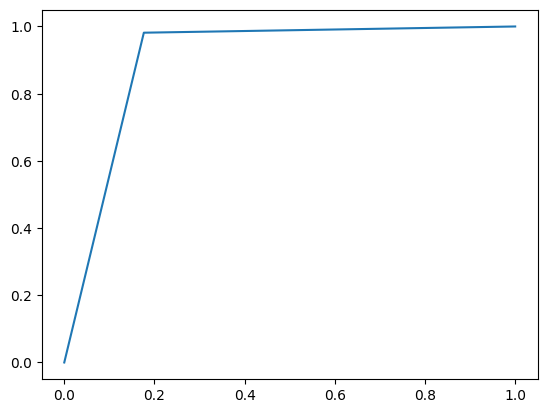

0.9025054466230936


In [15]:
# 앙상블 분석 : 아래 순서대로 랜덤 포레스트와 의사결정나무 모형을 구축하고 성능분석 결과를 비교하시오(혼동행렬, 정확도, roc, auc)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#넘파이 변환 -> 스플릿 -> 정규화 -> SVC

df = pd.read_csv("/content/drive/MyDrive/work/Ionosphere.csv", encoding='euc-kr')
display(df.head())

x = (df.loc[:, ((df.columns != 'V1') & (df.columns != 'V2') & (df.columns != 'Class'))]).to_numpy()

df['Class'] = df['Class'].map({'bad' : 0, 'good' : 1})

y = df['Class'].to_numpy()

trainx, testx, trainy, testy = train_test_split(x, y, random_state=55)

scaler = StandardScaler()

trainx_scale = scaler.fit_transform(trainx)
testx_scale = scaler.transform(testx)

model = RandomForestClassifier(n_estimators=100, random_state=42)

result = model.fit(trainx_scale, trainy)
ypred = result.predict(testx_scale)

print(model.score(trainx_scale, trainy))
print(model.score(testx_scale, testy))

print(accuracy_score(testy, ypred))

print(confusion_matrix(testy, ypred))

print(classification_report(testy, ypred))

print(model.feature_importances_)

fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr,tpr)
plt.show()

print(auc(fpr, tpr))

In [25]:
#의사결정트리 활용해서 정확도 측정해보자

#####얘는 정규화 필요 없음!!!!######

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_validate


model = DecisionTreeClassifier(max_depth=3, random_state=42)

scores = cross_validate(model, x, y, return_train_score=True)

model.fit(x,y)
predictions = model.predict(testx)

print(classification_report(testy, predictions))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.91      0.94      0.93        54

    accuracy                           0.91        88
   macro avg       0.91      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88



In [35]:
#회귀분석 : 다중 회귀분석 모형을 구축하고 회귀모형식을 이용하여 인구에 대한 예측값을 구하시오.
#판단스와 math 라이브러리의 수학함수를 이용하여 5개의 성능평가 지표를 구하시오(ME,RMSE,MAE,MPE,MAPE)

#다중회귀분석 : ols 사용하기!

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import math

df= pd.read_csv("/content/drive/MyDrive/work/state.csv", encoding='euc-kr')
display(df.head())

x=df[['Income','Life.Exp','Murder','HS.Grad','Frost']]
y=df['Population']

fit = ols('y ~ x',data=df).fit() #다중 선형회귀 분석 모형 구축
df['pred'] = fit.fittedvalues #예측값 저장
display(df.head())

print(fit.summary())

me = (df['Population']-df['pred']).mean()
mse = ((df['Population']-df['pred'])*(df['Population']-df['pred'])).mean()
rmse = math.sqrt(mse)
mae = abs((df['Population']-df['pred'])).mean()
mpe = ((df['Population']-df['pred'])/df['Population']).mean()
mape =abs(((df['Population']-df['pred'])/df['Population'])).mean()

print(me)
print(mse)
print(mean_squared_error(df['Population'], df['pred']))
print(rmse)
print(mae)
print(mpe)
print(mape)

,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


,Unnamed: 0,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,pred
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,7348.494316
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,7441.166692
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,4557.232837
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,5237.165902
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361,8926.090783


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     4.079
Date:                Tue, 19 Nov 2024   Prob (F-statistic):            0.00396
Time:                        06:54:21   Log-Likelihood:                -481.12
No. Observations:                  50   AIC:                             974.2
Df Residuals:                      44   BIC:                             985.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.082e+05   5.52e+04     -1.960      0.0

37257031.75303893
[0.         0.         0.02123178 0.97876822 0.        ]


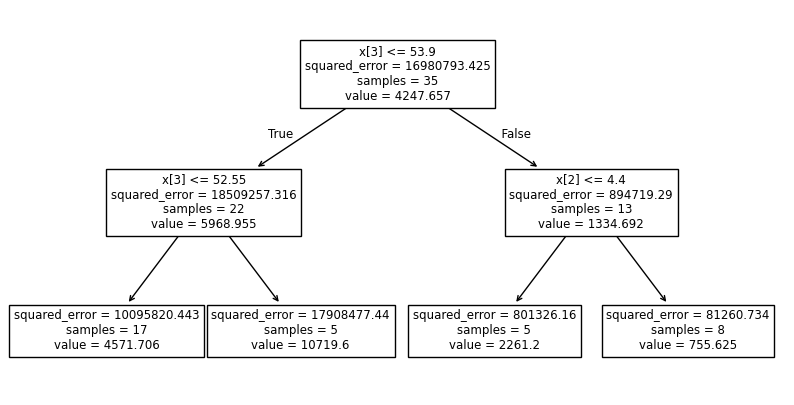

In [39]:
#의사결정나무 : 의사결정나무 분석 모형을 sklearn.tree 라이브러리의 DecisionTreeRegressor() 함수를 이용하여 구하고
#검증용 데이터를 이용하여 Population 값을 예측하시오

from sklearn.tree import DecisionTreeRegressor

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)

model = DecisionTreeRegressor(max_depth=2, random_state=42)

result = model.fit(trainx, trainy)

ypred = result.predict(testx)

print(mean_squared_error(testy, ypred))
print(model.feature_importances_)

plt.figure(figsize=(10,5))
plot_tree(model)
plt.show()

# 단원종합문제 : 제3유형


In [44]:
#iris 데이터를 이용해 각 품종에 대한 꽃잎과 꽃받침의 평균 길이에 대한 차이가 유의한지를 검정하시오
#1. setosa와 versicolor 품종에 대한 꽃잎의 길이(petal length)의 차이가 있는지를 검정하시오
#2. setosa 품종에 대하여 꽃잎과 꽃받침의 너비의 크기가 차이가 있는지를 검정하시오

from sklearn.datasets import load_iris
from scipy import stats

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = pd.DataFrame(data=iris['target'], columns=['target'])
df['species'] = df['species'].map({0:'setosa', 1:'verginica', 2:'versicolor'})
display(df.head())

df1 = df.loc[df.species == 'setosa']
df2 = df.loc[df.species == 'versicolor']

t, pvalue = stats.ttest_ind(df1['petal length (cm)'], df2['petal length (cm)'], equal_var=False) #독립표본 t검정, t분포, 유의확률
print(t)
print(pvalue)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


-49.98618625709594
9.26962758534569e-50


In [45]:
df1 = df.loc[df.species == 'setosa']
df2 = df.loc[df.species == 'setosa']

t, pvalue = stats.ttest_ind(df1['sepal width (cm)'], df2['petal width (cm)'], equal_var=False) #독립표본 t검정, t분포, 유의확률
print(t)
print(pvalue)

57.18806800331009
1.0116303263334372e-51


In [8]:
#카이제곱 검정을 수행하시오
#1. 주거지역(소도시, 중도시)에 따른 쿠폰 선호도의 비율 차이를 분석하시오
#2. 주거지역(소도시, 대도시)에 따른 쿠폰 선호도의 비율 차이를 분석하시오

#1번부터 해보쟝

import pandas as pd
import numpy as np
from scipy import stats

df= pd.read_csv("/content/drive/MyDrive/work/data.csv", encoding='euc-kr')
display(df.head())

dfs = df.loc()

df1 = df.loc[(df.주거지역 == '소도시')]
print(len(df1))
df2 = df.loc[(df.주거지역 == '중도시')]
print(len(df2))

x1 = len(df1.loc[(df.쿠폰선호도 == '예')])
x2 = len(df2.loc[(df.쿠폰선호도 == '예')])

print(x1/len(df1)) #소도시에서 예의 비율
print(x2/len(df2)) #중도시에서 예의 비율

#비율 검정 데이터 : [소도시 예, 중도시 예], [소도시 아니오, 중도시 아니오]
observed = [[[x1, x2], [len(df1)-x1, len(df2)- x2]]]

print(observed)

chi, pvalue, dof, expect = stats.chi2_contingency(observed) #카이제곱 검정

print(round(chi, 3))
print(round(pvalue, 4))

,고객번호,성별,연령대,직업,주거지역,쇼핑액,이용만족도,쇼핑1월,쇼핑2월,쇼핑3월,쿠폰사용회수,쿠폰선호도,품질,가격,서비스,배송,쇼핑만족도,소득
0,190105,남자,45-49세,회사원,소도시,195.6,4,76.8,64.8,54.0,3,예,7,7,1,4,4,4300
1,190106,남자,25-29세,공무원,소도시,116.4,7,44.4,32.4,39.6,6,아니오,7,4,7,7,7,7500
2,190107,남자,50세 이상,자영업,중도시,183.6,4,66.0,66.0,51.6,5,예,4,4,3,3,6,2900
3,190108,남자,50세 이상,농어업,소도시,168.0,4,62.4,52.8,52.8,4,아니오,3,3,4,6,5,5300
4,190109,남자,40-44세,공무원,중도시,169.2,4,63.6,54.0,51.6,5,아니오,6,4,7,4,6,4000


30
24
0.6666666666666666
0.5
[[[20, 12], [10, 12]]]
0.921
0.3371


In [13]:
#data.csv로 주요 변수에 대한 분산분석 수행(ANOVA)

#주거지역에 따른 이용만족도의 차이가 있는지를 일원배치 분산분석 수행 결과로 나타내시오

df= pd.read_csv("/content/drive/MyDrive/work/data.csv", encoding='euc-kr')
display(df.head())

#stats.f_oneway 쓰기

df1 = df[df['주거지역'] == '소도시'].이용만족도
df2 = df[df['주거지역'] == '중도시'].이용만족도
df3 = df[df['주거지역'] == '대도시'].이용만족도

group1 = df1.to_numpy()
group2 = df2.to_numpy()
group3 = df3.to_numpy()

F, pvalue = stats.f_oneway(group1, group2, group3) #그룹 여러개

print(F)
print(pvalue)

,고객번호,성별,연령대,직업,주거지역,쇼핑액,이용만족도,쇼핑1월,쇼핑2월,쇼핑3월,쿠폰사용회수,쿠폰선호도,품질,가격,서비스,배송,쇼핑만족도,소득
0,190105,남자,45-49세,회사원,소도시,195.6,4,76.8,64.8,54.0,3,예,7,7,1,4,4,4300
1,190106,남자,25-29세,공무원,소도시,116.4,7,44.4,32.4,39.6,6,아니오,7,4,7,7,7,7500
2,190107,남자,50세 이상,자영업,중도시,183.6,4,66.0,66.0,51.6,5,예,4,4,3,3,6,2900
3,190108,남자,50세 이상,농어업,소도시,168.0,4,62.4,52.8,52.8,4,아니오,3,3,4,6,5,5300
4,190109,남자,40-44세,공무원,중도시,169.2,4,63.6,54.0,51.6,5,아니오,6,4,7,4,6,4000


2.3015535688113733
0.10616798419154042


In [23]:
#mtcars.csv 데이터 중 마력, 무게, 변속기어(hp, wt, am)를 이용하여 mpg를 예측하는 다중 선형회귀 모형을 구축하시오

from statsmodels.formula.api import ols


df = pd.read_csv("/content/drive/MyDrive/work/mtcars.csv", encoding='euc-kr')
display(df.head())

#1. hp 항목에 대한 회귀계수를 구하시오. 소수점 이하 셋째 자리까지 출력하시오
x = df[['hp','wt','am']]
y = df['mpg']

fit = ols('y ~ x', data=df).fit()
print(fit.summary())
#회귀계수 : -0.037


#2. am 항목에 대한 유의확률을 소수점 이하 셋째 가리까지 출력하시오

#0.141


#3. (hp, wt, am) = (110, 3.215, 0)의 경우 mpg를 예측하고, hp 항목의 계수값에 대한 95% 신뢰구간을 출력하시오

pred = fit.predict(exog=dict(x=[[110, 3.215, 0]]))
print(pred)

#앞 인덱스가 상하 여부, 뒤 인덱스가 항목 순서(번째)
print(round(fit.conf_int(alpha=0.05)[0][1], 4)) #hp 항목에 대한 계수의 95% 신뢰구간 하한값(lower bound)
print(round(fit.conf_int(alpha=0.05)[1][1], 4)) #hp 항목에 대한 계수의 95% 신뢰구간 상한값(upper bound)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     48.96
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           2.91e-11
Time:                        08:30:19   Log-Likelihood:                -73.067
No. Observations:                  32   AIC:                             154.1
Df Residuals:                      28   BIC:                             160.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0029      2.643     12.867      0.0

<ipython-input-23-85dd67461139>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(fit.conf_int(alpha=0.05)[0][1], 4)) #hp 항목에 대한 계수의 95% 신뢰구간 하한값(lower bound)
<ipython-input-23-85dd67461139>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(fit.conf_int(alpha=0.05)[1][1], 4)) #hp 항목에 대한 계수의 95% 신뢰구간 상한값(upper bound)


In [30]:
#survived 예측

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#1. gender와 survived 변수 간의 독립성 검정을 실시하였을 때, 카이제곱 통계량
# Titanic 데이터셋 다운로드 URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# 데이터 읽기
df = pd.read_csv(url)
display(df.head())
print(len(df))

cont_table = pd.crosstab(df['Sex'], df['Survived']) #두 독립변수 간의 독립성 검정
print(cont_table)
chi2, pvalue, _, _ = stats.chi2_contingency(cont_table)
print(chi2) #260.717
print(pvalue)

#2. gender, SibSp, Parch, Fare를 독립변수로 사용하여 로지스틱 회귀모형을 실시하였을 때, Parch 변수의 계수값은?
x = df[['Sex','SibSp','Parch','Fare']]
y = df['Survived']

df['Sex'] = df['Sex'].map({'male' : 0, 'female':1})
df['Sex'] = df['Sex'].astype(float)
print(df['Sex'].dtype)

print(df['Sex'].unique())
print(x.dtypes)  # 독립 변수 데이터 타입 확인
print(y.dtypes)  # 종속 변수 데이터 타입 확인
df.info()

model = LogisticRegression()
result = model.fit(x, y) ##성별 부분이 해결 안됨.


fit.summary()
#3. 2번 문제에서 추정된 로지스틱 회귀모형에서 SibSp 변수가 한 단위 증가할 때 오즈비 값은?

coef = result.params['SibSp'] #SibSp에 해당하는 회귀 계수 추출
odds = np.exp(coef) #계수를 지수화
print(round(odds, 3))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


891
Survived    0    1
Sex               
female     81  233
male      468  109
260.71702016732104
1.1973570627755645e-58
float64
[0. 1.]
Sex       object
SibSp      int64
Parch      int64
Fare     float64
dtype: object
int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


ValueError: could not convert string to float: 'male'

# 기출 7회


In [37]:
df = pd.read_csv("/content/drive/MyDrive/work/Boston.csv", encoding='euc-kr')
display(df.head())

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
df = df.sort_values('crim', ascending=False)
display(df.head(10))


print(df['crim']) #1번


df.loc[df.crim > 25.9406, 'crim'] = 25.9406 #crim 컬럼이 해당 숫자보다 크다면, crim을 해당 숫자로 바꿔라
display(df)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,381,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,419,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,411,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,415,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
404,405,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,329.46,27.38,8.5
398,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
413,414,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,210.97,20.08,16.3
417,418,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
400,401,25.0461,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6


380    88.97620
418    73.53410
405    67.92080
410    51.13580
414    45.74610
         ...   
217     0.07013
180     0.06588
503     0.06076
88      0.05660
505     0.04741
Name: crim, Length: 240, dtype: float64


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
380,381,25.94060,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
418,419,25.94060,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8
405,406,25.94060,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,411,25.94060,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
414,415,25.94060,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,218,0.07013,0.0,13.89,0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69,28.7
180,181,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
88,89,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6


In [41]:
df = df.loc[(df.age >= 80)]
print(df['crim'].mean())

5.759386625


In [45]:
df = pd.read_csv("/content/drive/MyDrive/work/score.csv", encoding='euc-kr')

from sklearn.preprocessing import StandardScaler

display(df.head())

scaler = StandardScaler()

df['score_scale'] = scaler.fit_transform(df[['score']]) #새로운 컬럼 생성
#이중이면 df, 일중이면 시리즈
print(len(df[df['score_scale'] >= 0.8]))


,year,type,subject,score
0,2000,간호사,성인간호학,80
1,2000,간호사,모성간호학,40
2,2000,간호사,아동간호학,40
3,2000,간호사,지역사회간호학,40
4,2000,간호사,정신간호학,40


805


In [65]:
#score를 이용하여 다음 조건에 해당하는 상관계수 구하고, 그 값이 가장 큰 상관계수와 type을 출력

#1. 2022년인 데이터만 사용

df = pd.read_csv("/content/drive/MyDrive/work/score.csv", encoding='euc-kr')

df = df.loc[df.year == 2022]
display(df.head())
print(df.info())
print(len(df))

#year, subject 열을 제외하여 type, score 데이터를 df로 저장
df = df[['type', 'score']]


#type=(간호사, 간호조무사, 요양보호사, 의사)인 데이터를 dfnew 데이터프레임으로 저장
df['type'] = df['type'].str.strip() #문자열 포함된 공백 삭제

dfnew = df.loc[(df.type == '간호사') | (df.type == '간호조무사') | (df.type == '요양보호사') | (df.type == '의사')]

print(dfnew.head())

#type별로 score에 대한 상관계수를 구하여, correlation df로 저장. type별 데이터의 길이가 서로 다른 경우 길이가 최소인 type에 맞춰 상관계수를 구한다
dfnew.corr()

#correlation 데이터프레임에서 상관계수의 값이 가장 큰 값과 큰 값을 가지는 두 개의 type을 출력한다. 단, 음의 상관계수를 가지는 값은 양의 상관계수 값으로
#변환하여 크기를 서로 비교한다.





,year,type,subject,score
3938,2022,1급 장애인재활상담사,직업재활개론,22
3939,2022,1급 장애인재활상담사,재활상담,22
3940,2022,1급 장애인재활상담사,재활사례관리,22
3941,2022,1급 장애인재활상담사,직업평가,12
3942,2022,1급 장애인재활상담사,직무개발과 배치,17


<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 3938 to 4127
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     190 non-null    int64 
 1   type     190 non-null    object
 2   subject  190 non-null    object
 3   score    190 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.4+ KB
None
190
     type  score
3963  간호사     70
3964  간호사     35
3965  간호사     35
3966  간호사     35
3967  간호사     35


<ipython-input-65-a1d1d47e8ae8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].str.strip() #문자열 포함된 공백 삭제


ValueError: could not convert string to float: '간호사'

# 2~ 5회까지는1,2유형만
678회는 전부


# 기출 4회 제1유형


In [ ]:
# 데이터 파일 읽기 예제
import pandas as pd
df = pd.read_csv("data/basic1.csv")
#print(df.head())
#print(df.describe())

num = abs(77.000000-26.875000)
print(int(num))

In [ ]:
import pandas as pd
df = pd.read_csv("data/fb.csv")
#print(df.head())

df = df.loc[(df.loves + df.wows)/df.reactions > 0.4]
df = df.loc[(df.loves + df.wows)/df.reactions < 0.5]
df = df.loc[(df.type == 'video')]

print(len(df))

In [ ]:
# 데이터 파일 읽기 예제
import pandas as pd
df = pd.read_csv("data/nf.csv")
#print(df.head())
#print(df[['date_added']])
df['date_added'] = pd.to_datetime(df['date_added']) #date로 변환하고,

#print(df[['date_added']])

df = df[(df['date_added'].dt.year == 2018) & (df['date_added'].dt.month == 1)]
#print(df[['date_added']])

df = df[df['country'] == 'United Kingdom']
print(len(df))

# 기출 4회 제2유형


In [164]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part4/ch4/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/bigdata_analyst_cert/main/part4/ch4/test.csv")

encoder = LabelEncoder()

cols = df.select_dtypes(include='object').columns
print(cols)
for col in cols:
  df[col] = encoder.fit_transform(df[col])
  test[col] = encoder.transform(test[col])

x = df.drop(columns=['ID', 'Segmentation']) # 타켓변수는 제거
y = df['Segmentation']
x_test = test.drop(columns=['ID']) #ID 제거

display(x_test.head())

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=0)
model.fit(trainx, trainy)
pred = model.predict(testx)

print(f1_score(testy, pred, average='macro'))

test['Segmentation'] = model.predict(x_test)

submit = test[['ID', 'Segmentation']]
#print(submit.head())
submit.to_csv('submit.csv', index=False)
#print(submit)

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,1,1,59,0,4,11.0,1,2.0,5
3,1,1,47,1,1,0.0,1,5.0,3
4,1,1,61,1,1,5.0,2,3.0,5


0.49305330670459757


#

# 기출 3회 제1유형


In [59]:
import pandas as pd

df = pd.read_csv("/content/t1-data2.csv",index_col='year')
#인덱스열을 year로 정하면 해당 열을 쉽게 추출 가능!!
#display(df.head())

df = df.loc['2022년']
#print(df)

med = df.median()
print(med)

len = df > med #true 인 것만 개수 세기
print(sum(len))

54.5
50


In [6]:
df = pd.read_csv('/content/t1-data1.csv')
#print(df.shape)
df = df.dropna() #결측치행 제거
#df = df.dropna(axis=0, inplace=True)
print(df.head())
print(df.shape)

#print(61 * 0.6) #36.6이니까 앞에서부터 36개 행만 사용
#display(df.head())

df = df.iloc[:36,]
#print(df.shape)

#print(df.describe())

print(df['f1'].quantile(0.75))

     id   age city    f1  f2    f4         f5
1  id02   9.0   서울  70.0   1  ENFJ  60.339826
2  id03  27.0   서울  61.0   1  ISTJ  17.252986
4  id05  24.0   서울  85.0   2  ISFJ  29.269869
5  id06  22.0   서울  57.0   0  INTP  20.129444
6  id07  36.3   서울  60.0   1  ISFJ   9.796378
(61, 7)
77.25


In [80]:
df = pd.read_csv('/content/t1-data1.csv')

df.isnull().sum()
print('f1')

f1


# 기출 3회 제2유형


In [29]:
#분류
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train = pd.read_csv("/content/t2-1-train.csv")
test = pd.read_csv("/content/t2-1-test.csv")

#display(train.head())
#display(test.head())

train['AnnualIncome'] = train['AnnualIncome'].fillna(train['AnnualIncome'].median())
test['AnnualIncome'] = test['AnnualIncome'].fillna(test['AnnualIncome'].median())

df = pd.concat([train,test]) #합친 후 인코딩하기
print(df.shape)

encoder = LabelEncoder()
cols = df.select_dtypes(include='object').columns

for col in cols:
  df[col] = encoder.fit_transform(df[col])

train = df[:train.shape[0]].copy()
test = df[train.shape[0]:].copy()


# One-Hot Encoding
#train = pd.get_dummies(train, columns=cols, drop_first=True)
#test = pd.get_dummies(test, columns=cols, drop_first=True)


x = train.drop(columns=['id','TravelInsurance'])
y = train['TravelInsurance']
x_test = test.drop(columns=['id','TravelInsurance'])

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=0)

model.fit(trainx, trainy)
pred = model.predict_proba(testx)


print(roc_auc_score(testy, pred[:,1])) #두 번째 열이랑 비교하기

test['TravelInsurance'] = model.predict_proba(x_test)[:,1]

submit = test[['id', 'TravelInsurance']]

submit.to_csv('submit_3.csv',index=False)

display(submit.head())

#-----------------------------------------------------------

#분류
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train = pd.read_csv("https://raw.githubusercontent.com/RoRdil31/Data-Analytics-Certification/refs/heads/main/data/t2-1-train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/RoRdil31/Data-Analytics-Certification/refs/heads/main/data/t2-1-test.csv")

train['AnnualIncome'] = train['AnnualIncome'].fillna(train['AnnualIncome'].median())
test['AnnualIncome'] = test['AnnualIncome'].fillna(test['AnnualIncome'].median())

df = pd.concat([train,test]) #합친 후 인코딩하기
print(df.shape)
# display(test)
encoder = LabelEncoder()
cols = df.select_dtypes(include='object').columns

for col in cols:
  df[col] = encoder.fit_transform(df[col])

train = df[:train.shape[0]].copy()
test = df[train.shape[0]:].copy()
display(train)
display(test)

# One-Hot Encoding
#train = pd.get_dummies(train, columns=cols, drop_first=True)
#test = pd.get_dummies(test, columns=cols, drop_first=True)


x = train.drop(columns=['id','TravelInsurance'])
y = train['TravelInsurance']
x_test = test.drop(columns=['id','TravelInsurance'])

display(x_test)
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=0)

model.fit(trainx, trainy)
pred = model.predict_proba(testx)

print(roc_auc_score(testy, pred[:,1])) #두 번째 열이랑 비교하기

test['TravelInsurance'] = model.predict_proba(x_test)[:,1]

submit = test[['id', 'TravelInsurance']]

submit.to_csv('submit_3.csv',index=False)

display(submit.head())

(1987, 10)
0.8092117895545314


,id,TravelInsurance
0,0,0.1500
1,1,0.0000
2,2,0.0000
3,3,1.0000
4,4,0.2625


(1987, 10)


,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,10000,28,2,1,1250000.0,6,1,0,0,0.0
1,10001,31,2,1,1250000.0,7,1,0,0,0.0
2,10002,29,2,1,1200000.0,7,0,0,0,1.0
3,10003,33,1,1,650000.0,6,1,0,0,1.0
4,10004,28,2,1,800000.0,6,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
1485,11485,28,2,1,800000.0,4,0,0,0,0.0
1486,11486,34,2,1,1000000.0,9,0,0,0,0.0
1487,11487,26,2,1,450000.0,5,1,0,0,1.0
1488,11488,25,2,0,1150000.0,3,1,0,1,0.0


,id,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,32,1,1,650000.0,5,0,0,0,NaN
1,1,27,1,1,500000.0,5,0,0,0,NaN
2,2,32,1,1,350000.0,2,0,0,0,NaN
3,3,26,2,1,1400000.0,6,0,0,1,NaN
4,4,27,2,0,350000.0,3,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
492,492,25,2,0,1150000.0,5,1,1,0,NaN
493,493,34,2,1,1500000.0,9,0,1,1,NaN
494,494,33,1,1,700000.0,4,0,0,0,NaN
495,495,26,2,1,1400000.0,4,0,0,1,NaN


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,32,1,1,650000.0,5,0,0,0
1,27,1,1,500000.0,5,0,0,0
2,32,1,1,350000.0,2,0,0,0
3,26,2,1,1400000.0,6,0,0,1
4,27,2,0,350000.0,3,0,0,0
...,...,...,...,...,...,...,...,...
492,25,2,0,1150000.0,5,1,1,0
493,34,2,1,1500000.0,9,0,1,1
494,33,1,1,700000.0,4,0,0,0
495,26,2,1,1400000.0,4,0,0,1


0.8092117895545314


,id,TravelInsurance
0,0,0.1500
1,1,0.0000
2,2,0.0000
3,3,1.0000
4,4,0.2625


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,207,315,99,2,3.5,3.0,7.89,0
1,14,307,109,3,4.0,3.0,8.00,1
2,119,296,99,2,3.0,3.5,7.28,0
3,243,324,115,3,3.5,3.0,8.76,1
4,236,326,111,5,4.5,4.0,9.23,1


,Serial No.,Chance of Admit
0,207,0.63
1,14,0.62
2,119,0.47
3,243,0.70
4,236,0.88


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,128,319,112,3,2.5,2.0,8.71,1
1,76,329,114,2,2.0,4.0,8.56,1
2,151,334,114,4,4.0,4.0,9.43,1
3,102,312,105,2,2.5,3.0,8.12,0
4,272,299,96,2,1.5,2.0,7.86,0


# 기출 2회 제1유형


In [157]:
df = pd.read_csv("/content/basic1.csv")
df = df.sort_values('f5', ascending=False)


m = 91.297791

df.iloc[:9, 7] = m
#print(df.head(15))

df = df.loc[df.age >= 80]
#print(df)
print(df['f5'].mean())

62.497747132173906


# 기출 5회 제2유형

In [221]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

print(train.head())
print(test.head())
print(train.columns)

encoder = LabelEncoder()

cols = train.select_dtypes(include='object').columns
for col in cols:
  train[col] = encoder.fit_transform(train[col])
  test[col] = encoder.transform(test[col])


x = train.drop(columns=['price'])
y = train['price']
#x_test = test.drop(columns=['price'])

#scaler = StandardScaler()
#scaler.fit_transform(x)
#scaler.transform(test)

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(trainx, trainy)

pred = model.predict(testx)

print(np.sqrt(mean_squared_error(testy, pred)))

test['price'] = model.predict(test)
display(test[['price']])

test['price'].to_csv("price.csv", index=False)


       model  year  price transmission  mileage fuelType  tax   mpg  \
0   EcoSport  2017  10298       Manual    25013   Petrol  150  53.3   
1      Focus  2016  10491       Manual    30970   Diesel    0  74.3   
2      S-MAX  2017  13498       Manual    60200   Diesel  150  56.5   
3     Fiesta  2018  10600       Manual    27380   Petrol  145  56.5   
4     Fiesta  2018  11000       Manual     7724   Petrol  145  65.7   

   engineSize  
0         1.0  
1         1.5  
2         2.0  
3         1.0  
4         1.0  
     model  year transmission  mileage fuelType  tax   mpg  engineSize
0    S-MAX  2016       Manual    23905   Diesel  125  56.5         2.0
1   Fiesta  2018       Manual    16895   Petrol  145  40.3         1.5
2     Kuga  2017       Manual    12109   Petrol  165  45.6         1.5
3     Kuga  2018    Semi-Auto    13940   Diesel  145  58.9         1.5
4   Fiesta  2013       Manual    31690   Petrol   30  54.3         1.2
Index(['model', 'year', 'price', 'transmission', 'm

,price
0,15273.54
1,16033.71
2,15021.79
3,18289.57
4,6128.53
...,...
1612,11545.31
1613,18123.41
1614,9560.38
1615,13565.43


# 작업형3 2024버전


In [42]:
#1. 다중 선형 회귀

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report

df = pd.read_csv("/content/t3_regression_data.csv")
display(df.head())

x = df[['x1','x2','x3','x4']]
fit = ols('y ~ x', data=df).fit()
df['pred'] = fit.fittedvalues
display(df.head())
print(fit.summary()) #1. x1이 가장 큼

#유의미하지 않은 변수를 제거
dfnew = df.drop(columns=['x4'])
xnew = dfnew[['x1','x2','x3']]
fitnew = ols('y ~ xnew', data=dfnew).fit()
dfnew['pred'] = fitnew.fittedvalues
print(fitnew.summary()) #2. x2가 가장 작음
#3. R-squared:    0.988

#pred = fit.predict(exog=dict(x=[[5, 12, 10, 3]]))
print(pred) #4. y값 : -0.243308

matrix = x.corr(method='pearson')
print(matrix)
#5. 가장 큰 상관계수가 뭐임??????

df_6 = df.copy()
x_6 = df_6[['x1','x2']]
fit_6 = ols('y ~ x_6', data=df).fit()
df_6['pred'] = fit_6.fittedvalues
print(fit_6.summary())
# 6. R-squared:  0.964

residuals = fit.resid
print(residuals.std()) #잔차의 표준편차 : 0.9001841451852479


#신뢰구간을 사용하려면 get_prediction 사용하기
new_data = pd.DataFrame({'x1': [5], 'x2': [12], 'x3': [10], 'x4': [3]})

model = smf.ols('y ~ x1 + x2 + x3 + x4',data=df).fit()

pred = model.get_prediction(new_data).summary_frame(alpha=0.03)
print(pred)

#8. 97%신뢰구간 하한 : -0.540231
#9. 97%신뢰구간 상한 : 0.053614

# mean : 예측된 평균값
# mean_se : 예측된 평균값의 표준오차
# mean_ci_lower : 예측값의 신뢰구간 하한(신뢰구간 하한)
# mean_ci_upper : 예측값의 신뢰구간 상한
# obs_ci_lower : 관측값의 신뢰구간 하한(예측구간 하한)
# obs_ci_upper : 관측값의 신뢰구간 상한
#

,x1,x2,x3,x4,y
0,1.354882,13.660146,12.025720,2.265464,-10.090372
1,8.878517,12.798070,14.194644,4.694667,7.798310
2,9.326056,18.815027,9.817460,2.519119,-2.287519
3,4.455682,11.667165,7.402825,4.801164,-1.945564
4,3.882355,11.008464,14.603228,3.360569,1.628605


,x1,x2,x3,x4,y,pred
0,1.354882,13.660146,12.025720,2.265464,-10.090372,-9.079732
1,8.878517,12.798070,14.194644,4.694667,7.798310,8.292317
2,9.326056,18.815027,9.817460,2.519119,-2.287519,-1.865061
3,4.455682,11.667165,7.402825,4.801164,-1.945564,-2.000921
4,3.882355,11.008464,14.603228,3.360569,1.628605,1.143523


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1984.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.39e-90
Time:                        07:36:51   Log-Likelihood:                -130.88
No. Observations:                 100   AIC:                             271.8
Df Residuals:                      95   BIC:                             284.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9816      0.740      4.029      0.0

In [20]:
# 로지스틱 회귀2
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.formula.api import logit
import statsmodels.api as sm

df = pd.read_csv("/content/Customer_Data.csv")
display(df.head())
print(df.shape)

print(df.isnull().sum())

train = df.iloc[:350,:]
test = df.iloc[350:,:]
print(train.shape, test.shape)

X_train = train[['income']]
y_train = train['purchase']
X_test = test[['income']]
y_test = test['purchase']

#문제 1-1. income 변수를 독립변수로 purchase를 종속변수로 사용하여 로지스틱 회귀 모형을 만들고,
#income 변수가 한 단위 증가할 때 구매할 오즈비 값을 계산하시오. (반올림하여 소수 넷째자리까지 계산)
model = LogisticRegression()
result = model.fit(X_train, y_train)

print(np.exp(model.coef_[0][0])) #income의 회귀 계수로 np.exp 써서 오즈비 구하기
#odds = np.exp(result.params['income'])
#print(odds)
#1. 오즈비 : 1.0000019601806147

#문제 1-2. 독립변수 income만 사용해 학습한 모델에서 test 데이터의 purchase(종속변수)를 예측하고,
#accuracy (정확도)를 구하시오. (반올림하여 소수 셋째자리까지 계산)
pred = result.predict(X_test) #독립변수를 사용하여 종속 변수를 예측
print(accuracy_score(y_test,pred))
#정확도 : 0.5066666666666667


#문제 1-3. 독립변수 income만 사용해 학습한 모델의 로짓 우도를 계산하시오.
#로짓 우도 : 모델이 주어진 데이터에 얼마나 잘 맞는지를 측정하는 값(우도 함수의 로그값으로 계산)
model_sm = sm.Logit(y_train, X_train).fit()
log = model_sm.llf
print(log) #-242.47789453392522


#문제 1-4. 독립변수 income만 사용해 학습한 모델의 유의확률(p-value)를 구하시오.
pvalue = model_sm.pvalues['income']
print(pvalue)
# pvalue : 0.6191201840351774



,age,income,marital_status,children,gender,purchase
0,62,111980,1,2,1,0
1,65,107314,0,3,1,0
2,18,56209,1,1,1,1
3,21,28010,1,3,0,1
4,21,79618,0,2,0,1


(500, 6)
age               0
income            0
marital_status    0
children          0
gender            0
purchase          0
dtype: int64
(350, 6) (150, 6)
1.0000019601806147
0.5066666666666667
Optimization terminated successfully.
         Current function value: 0.692794
         Iterations 2
-242.47789453392522
0.6191201840351774


In [22]:
#wilcoxoc-py

#베스킨라빈스는 쿼트(Quart) 아이스크림의 중앙값이 620g이라고 주장하고 있습니다.
#저는 실제로 이 아이스크림의 중앙값이 620g보다 무겁다고 주장합니다. 다음은 20개의
#쿼트 아이스크림 샘플의 무게 측정 결과입니다. 이 측정 결과를 바탕으로 나의 주장이
#사실인지 비모수 검정(Wilcoxon Signed-Rank Test)을 통해 검정해보십시오.
#p-value값을 반올림하여 소수점 둘째 자리까지 계산

#귀무가설: "베스킨라빈스 쿼트 아이스크림의 중앙값은 620g이다."
#대립가설: "베스킨라빈스 쿼트 아이스크림의 중앙값은 620g보다 무겁다."

import pandas as pd
from scipy.stats import wilcoxon

data = {
    "weight": [630, 610, 625, 615, 622, 618, 623, 619, 620, 624, 616, 621, 617, 629, 626, 620, 618, 622, 625, 615,
               628, 617, 624, 619, 621, 623, 620, 622, 618, 625, 616, 629, 620, 624, 617, 621, 623, 619, 625, 618,
               622, 620, 624, 617, 621, 623, 619, 625, 618, 622]
}
df = pd.DataFrame(data)

med = 620 #중앙값

# Wilcoxon Signed-Rank Test 수행
# 비모수적 통계 검정,

# df['weight'] : 검정하고자 하는 측정값
# med : 비교하고자 하는 중앙값
#귀무 가설(): "데이터의 중앙값이 med와 같거나 작다"
#greater : 데이터의 중앙값이 기준값보다 크다
#less : 데이터의 중앙값이 기준값보다 작다
#two-sided : 데이터의 중앙값이 기준값과 다르다(크거나 작다).

result = wilcoxon(df['weight'] - med, alternative='greater')
pvalue = round(result.pvalue, 2)
print(pvalue) #답 : 0.03




0.03


In [19]:
#잔차이탈도

#age, income, marital_status 변수를 독립변수로 purchase를 종속변수로 사용하여
#로지스틱 회귀 모형을 만들고, 잔차이탈도를 구하시오. (반올림하여 소수 넷째자리까지 계산)

import pandas as pd
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit


df = pd.read_csv("/content/Customer_Data.csv")
display(df.head())

train = df[:300]
test = df[300:]

X_train = train[['age','income','marital_status']]
y_train = train['purchase']
X_test = test[['age','income','marital_status']]
y_test = test['purchase']


#model = LogisticRegression()
#fit = model.fit(X_train, y_train)
#pred = fit.predict_proba(X_test)
#print(pred)

model = logit('purchase ~ age + income + marital_status', data=train).fit()
print(model.summary())

#잔차이탈도 : 로그 가능도를 기반으로 모델의 성능 평가 지표(작을수록 적합도가 높음)

#잔차이탈도 : 로그가능도 * -2

print(-2* model.llf) #412.44898262591204

print(round(-2* model.llf, 4)) #412.449



,age,income,marital_status,children,gender,purchase
0,62,111980,1,2,1,0
1,65,107314,0,3,1,0
2,18,56209,1,1,1,1
3,21,28010,1,3,0,1
4,21,79618,0,2,0,1


Optimization terminated successfully.
         Current function value: 0.687415
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               purchase   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                0.007474
Time:                        01:24:20   Log-Likelihood:                -206.22
converged:                       True   LL-Null:                       -207.78
Covariance Type:            nonrobust   LLR p-value:                    0.3756
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3407      0.452      0.753      0.451      -0.546       1.227
age              